<a href="https://colab.research.google.com/github/sreesanka-ajayan/Crop_Yeild/blob/main/EL4013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

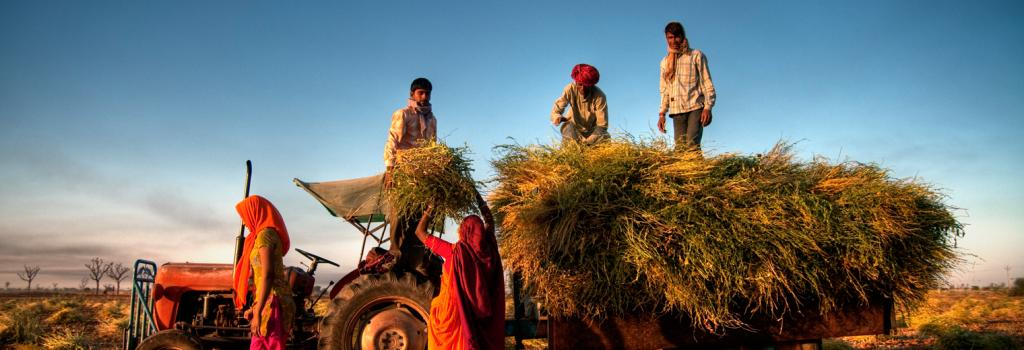

# **Crop Yield Analysis**


Agriculture has long been an important source of food and employment for the human race. One of the most difficult challenges facing the agriculture industry is predicting yields. Increased post-harvest losses and a lack of understanding about harvest glut are some of the causes that cause a drop in crop productivity. Machine learning techniques are being used to study on the top ten most consumed yields around the world and the factors affecting.



## **Gathering & Cleaning Data**

####Crops Yield Data:

Crop yields of the ten most consumed crops throughout the world were downloaded from the Food and Agriculture Organization of the United Nations [[FAO](https://www.fao.org/faostat/en/#home)] website after importing the relevant libraries. 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

The information gathered includes about the crop yield nation, item, year (from 1961 to 2016), and yield value.

In [7]:
df_yield = pd.read_csv('/content/drive/MyDrive/agri_Data/yield.csv')

In [8]:
df_yield

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


The graph below shows the total yield from 1961 to 2016.

<BarContainer object of 56 artists>

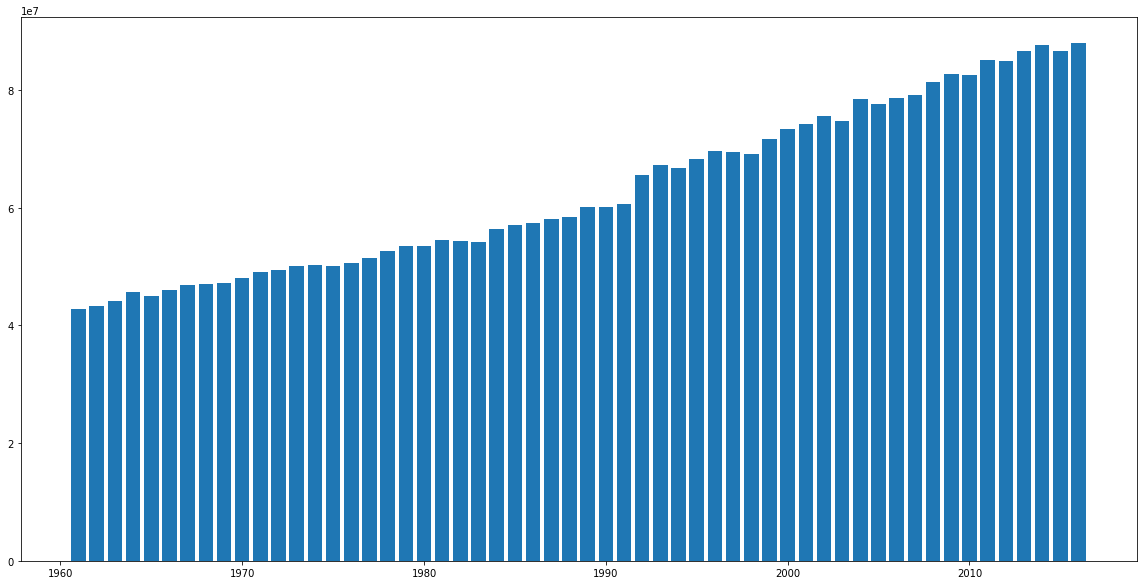

In [3]:
d=df_yield[['Area','Year','Value']].groupby(by='Year').sum()
type(d)
plt.figure(figsize=(20,10))
d.values.reshape(1,-1)[0]
plt.bar(d.index,d.values.reshape(1,-1)[0])

In [4]:
df_yield.shape

(56717, 12)

There are 56717 rows and 12 different columns indicating different features. Looking at the columns in the csv, we may rename Value to hg/ha yield to make it clear that this is the quantity production of our crops. Aside from removing unnecessary columns such as Area Code, Domain, Item Code, and so on.

In [9]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [10]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


**Climate Data**:

Precipitation and temperature are examples of climatic factors. For this project, information on annual rainfall was obtained from [Our World in Data](https://ourworldindata.org/grapher/average-precipitation-per-year), while information on temperature was obtained from the Food and Agriculture Organization of the United Nations.



In [11]:
# Rainfall data
df_rain = pd.read_csv('/content/drive/MyDrive/agri_Data/rainfall.csv')
df_rain 

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
...,...,...,...
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657


In [12]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


The "Area" column contains a blank area in the front. removing the space is necessary for the subsequent smoothness analysis without error. Additionally, the conversion of "average rain fall mm per year" from object to float is required.

In [13]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Temperature data from FAO.

In [14]:
df_temp=  pd.read_csv('/content/drive/MyDrive/agri_Data/temp.csv')
df_temp = df_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
df_temp

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


There are 71311 entries in the temperature data, ranging from 1849 to 2013, with temperature data available in just 68764 of them. As a result, there are NA values in the temperature data, which will be corrected throughout the data cleaning process.

In [15]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


**Pesticides Data**:

Pesticides used in each country was also collected from FAO database.

In [16]:
df_pes = pd.read_csv('/content/drive/MyDrive/agri_Data/pesticides.csv')
df_pes

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [17]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


Renaming the pesticide value column "pesticide(tone)" to indicate that the unit is in tone, as well as eliminating unwanted columns

In [18]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides(tonnes)"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                4349 non-null   object 
 1   Year                4349 non-null   int64  
 2   pesticides(tonnes)  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


## Soil Nutrition dataset

Soil Nutrition dataset was also collected from FAO.

In [19]:
df_fer = pd.read_csv('/content/drive/MyDrive/agri_Data/new_Soil_nutrient_budget_E_All_Data_(Normalized).csv')
df_fer

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,5061,Synthetic Fertilizers,7275,Cropland nutrient flow,1961,1961,tonnes,1000.0000,E
1,2,Afghanistan,5061,Synthetic Fertilizers,7275,Cropland nutrient flow,1962,1962,tonnes,1000.0000,E
2,2,Afghanistan,5061,Synthetic Fertilizers,7275,Cropland nutrient flow,1963,1963,tonnes,1000.0000,E
3,2,Afghanistan,5061,Synthetic Fertilizers,7275,Cropland nutrient flow,1964,1964,tonnes,1000.0000,E
4,2,Afghanistan,5061,Synthetic Fertilizers,7275,Cropland nutrient flow,1965,1965,tonnes,1000.0000,E
...,...,...,...,...,...,...,...,...,...,...,...
196025,5873,OECD,5081,Soil nutrient budget,7276,Cropland nutrient flow per unit area,2014,2014,kg/ha,72.8528,A
196026,5873,OECD,5081,Soil nutrient budget,7276,Cropland nutrient flow per unit area,2015,2015,kg/ha,73.7137,A
196027,5873,OECD,5081,Soil nutrient budget,7276,Cropland nutrient flow per unit area,2016,2016,kg/ha,74.7144,A
196028,5873,OECD,5081,Soil nutrient budget,7276,Cropland nutrient flow per unit area,2017,2017,kg/ha,74.4503,A


In [20]:
df_fer['Item'].nunique()

8

There are eight different Items in the fertiliser data set, of which we only need six. We must then sort the Items, create a separate data frame, and merge it with respect to the counters and respective years.

In [23]:
print(df_fer['Item'].value_counts())

Input                      12989
Outputs                    12989
Soil nutrient budget       12989
Crop Removal               12989
Manure applied to Soils    12903
Atmospheric Deposition     12258
Biological Fixation        11135
Synthetic Fertilizers      10985
Name: Item, dtype: int64


In [22]:
# renaming the Value feild to tonnes
df_fer=df_fer[df_fer['Unit']=='tonnes']
df_fer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99237 entries, 0 to 195971
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     99237 non-null  int64  
 1   Area          99237 non-null  object 
 2   Item Code     99237 non-null  int64  
 3   Item          99237 non-null  object 
 4   Element Code  99237 non-null  int64  
 5   Element       99237 non-null  object 
 6   Year Code     99237 non-null  int64  
 7   Year          99237 non-null  int64  
 8   Unit          99237 non-null  object 
 9   Value         99237 non-null  float64
 10  Flag          99237 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 9.1+ MB


In [24]:
#creating different data frame for each singe items
df1=df_fer[df_fer['Item']=='Crop Removal']
df2=df_fer[df_fer['Item']=='Manure applied to Soils']
df3=df_fer[df_fer['Item']=='Input']
df4=df_fer[df_fer['Item']=='Atmospheric Deposition']
df5=df_fer[df_fer['Item']=='Biological Fixation']
df6=df_fer[df_fer['Item']=='Synthetic Fertilizers']

Checking that a single value existed for a specific countery in a given year.

In [25]:
df1[(df1['Area']=='Afghanistan')& (df1['Year']==1961)]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
348,2,Afghanistan,5077,Crop Removal,7275,Cropland nutrient flow,1961,1961,tonnes,74154.2,Fc


For the crop removel dataset, the "value" column has been renamed, and the unnecessary columns have been eliminated. The term "crop removal" refers to the process of burning or burying the crop's stem and leaf after it has been framed in order to improve soil fertility.

In [27]:
# rename columns.Crop Removal
df1 = df1.rename(index=str, columns={"Value": "Crop Removal(tonnes)"})
df1 = df1.drop(['Area Code','Item Code','Element Code','Item','Element','Year Code','Unit','Flag'	], axis=1)
df1

,Area,Year,Crop Removal(tonnes)
348,Afghanistan,1961,7.415420e+04
349,Afghanistan,1962,7.596691e+04
350,Afghanistan,1963,7.130287e+04
351,Afghanistan,1964,7.625332e+04
352,Afghanistan,1965,7.736411e+04
...,...,...,...
195503,OECD,2014,2.451221e+07
195504,OECD,2015,2.419513e+07
195505,OECD,2016,2.564776e+07
195506,OECD,2017,2.591604e+07


For the Manure applied to Soils data set, the "value" column has been renamed, and the unused columns have been eliminated. Manure is a type of organic fertiliser that is used in agriculture. Animal faeces makes up the majority of manure; compost and green manure are other options.

In [28]:
# rename columns.Manure applied to Soils
df2 = df2.rename(index=str, columns={"Value": "Manure applied to Soils(tonnes)"})
df2 = df2.drop(['Area Code','Item Code','Element Code','Item','Element','Year Code','Unit','Flag'	], axis=1)
df2

,Area,Year,Manure applied to Soils(tonnes)
116,Afghanistan,1961,5.624520e+04
117,Afghanistan,1962,5.704647e+04
118,Afghanistan,1963,5.859424e+04
119,Afghanistan,1964,5.980591e+04
120,Afghanistan,1965,6.162054e+04
...,...,...,...
195271,OECD,2014,8.761682e+06
195272,OECD,2015,8.830511e+06
195273,OECD,2016,8.886081e+06
195274,OECD,2017,8.927231e+06


For the fertiliser, the "value" column has been renamed, and the unused columns have been eliminated. The three main primary macronutrient targeted by fertilisation are nitrogen (N), phosphorus (P), and potassium (K).

In [29]:
# rename columns.Fertilizer
df3 = df3.rename(index=str, columns={"Value": "Fertilizer(tonnes)"})
df3 = df3.drop(['Area Code','Item Code','Element Code','Item','Element','Year Code','Unit','Flag'	], axis=1)
df3

,Area,Year,Fertilizer(tonnes)
464,Afghanistan,1961,1.224349e+05
465,Afghanistan,1962,1.251743e+05
466,Afghanistan,1963,1.285808e+05
467,Afghanistan,1964,1.317936e+05
468,Afghanistan,1965,1.350666e+05
...,...,...,...
195735,OECD,2014,5.274751e+07
195736,OECD,2015,5.283369e+07
195737,OECD,2016,5.472471e+07
195738,OECD,2017,5.510003e+07


For the Atmospheric Deposition dataset, the "value" column has been renamed, and the unused columns have been eliminated. Atmospheric deposition is the process by which precipitation (rain, snow,lightning, fog), particles, aerosols, and gases migrate from the atmosphere to the earth's surface, as long recognised by scientists. Nitrogen emissions and subsequent deposition, in addition to contributing to acidic deposition, can have an impact on resources by contributing to their overnutrition.

In [30]:
# rename columns.Atmospheric Deposition
df4 = df4.rename(index=str, columns={"Value": "Atmospheric Deposition(tonnes)"})
df4 = df4.drop(['Area Code','Item Code','Element Code','Item','Element','Year Code','Unit','Flag'	], axis=1)
df4

,Area,Year,Atmospheric Deposition(tonnes)
232,Afghanistan,1961,6.518974e+04
233,Afghanistan,1962,6.712788e+04
234,Afghanistan,1963,6.898651e+04
235,Afghanistan,1964,7.098769e+04
236,Afghanistan,1965,7.244606e+04
...,...,...,...
195387,OECD,2014,3.746089e+06
195388,OECD,2015,3.756080e+06
195389,OECD,2016,3.763063e+06
195390,OECD,2017,3.782930e+06


For the Biological Fixation dataset, the "value" column has been renamed, and the unused columns have been eliminated. The process of incorporating nitrogen gas (N2) from the environment into the tissue of certain plants is known as biological nitrogen fixation (BNF). Only a small number of plants can receive nitrogen this way, due to the presents of soil microbes.

In [31]:
df5 = df5.rename(index=str, columns={"Value": "Biological Fixation(tonnes)"})
df5 = df5.drop(['Area Code','Item Code','Element Code','Item','Element','Year Code','Unit','Flag'	], axis=1)
df5

,Area,Year,Biological Fixation(tonnes)
1276,Albania,1961,277.41
1277,Albania,1962,267.87
1278,Albania,1963,420.48
1279,Albania,1964,383.70
1280,Albania,1965,250.77
...,...,...,...
195619,OECD,2014,10117973.06
195620,OECD,2015,10229782.72
195621,OECD,2016,11248626.44
195622,OECD,2017,11655060.39


For the Synthetic Fertilizers dataset, the "value" column has been renamed, and the unused columns have been eliminated. Synthetic fertilisers are inorganic substances that are "man-made," mainly from petroleum industry by-products. Ammonium Nitrate, Ammonium Phosphate, Superphosphate, and Potassium Sulfate are among examples.

In [32]:
#rename colum Synthetic Fertilizers
df6 = df6.rename(index=str, columns={"Value": "Synthetic Fertilizers(tonnes)"})
df6 = df6.drop(['Area Code','Item Code','Element Code','Item','Element','Year Code','Unit','Flag'	], axis=1)
df6

,Area,Year,Synthetic Fertilizers(tonnes)
0,Afghanistan,1961,1000.00
1,Afghanistan,1962,1000.00
2,Afghanistan,1963,1000.00
3,Afghanistan,1964,1000.00
4,Afghanistan,1965,1000.00
...,...,...,...
195155,OECD,2014,30121768.25
195156,OECD,2015,30017316.09
195157,OECD,2016,30826936.45
195158,OECD,2017,30734806.39


Ploting the graph of soil nutrition dataset.

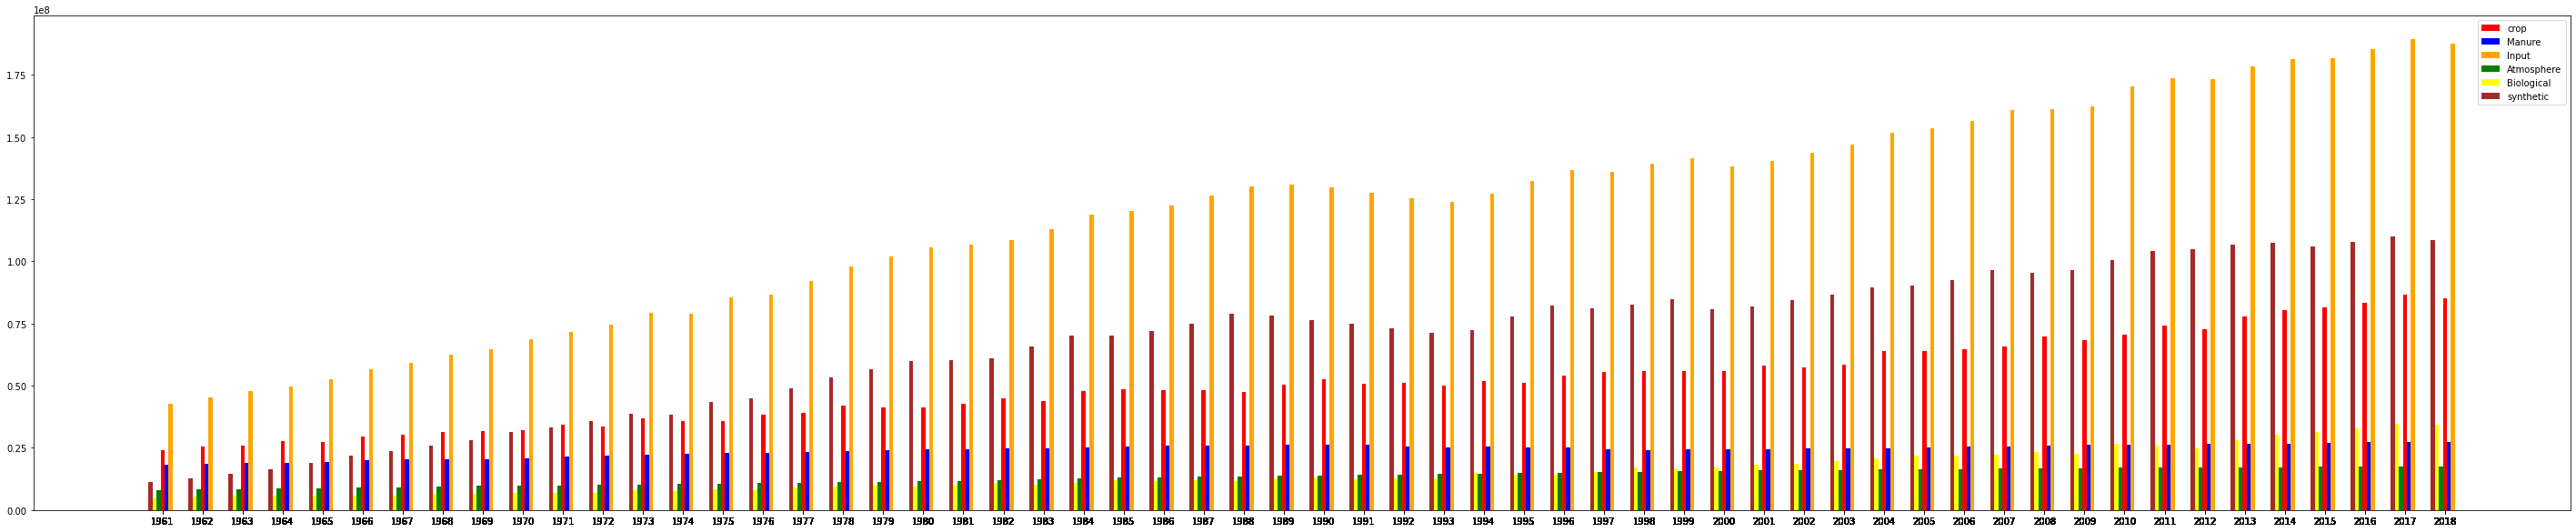

In [35]:
d=df_fer[['Item','Year','Value']]
year=d['Year'].value_counts().index

Crop=d[d['Item']=='Crop Removal']
Manure=d[d['Item']=='Manure applied to Soils']
Input=d[d['Item']=='Input']
Atmospheric=d[d['Item']=='Atmospheric Deposition']
Biological=d[d['Item']=='Biological Fixation']
Synthetic=d[d['Item']=='Synthetic Fertilizers']
width=0.1
fig,ax=plt.subplots()
cropyr=Crop['Year']
manureyr=Manure['Year']+width
Inputr =Input['Year']+2*width
ADr  = Atmospheric["Year"]-width
BDr = Biological["Year"]-2*width
Syr  = Synthetic["Year"]-3*width
ax.bar(cropyr,Crop['Value'],width=width,color='red',label="crop")
ax.bar(manureyr,Manure['Value'],width=width,color='b',label="Manure")
ax.bar(Inputr,Input['Value'],width=width,color='orange',label="Input")
ax.bar(ADr,Atmospheric['Value'],width=width,color='green',label="Atmosphere")
ax.bar(BDr ,Biological['Value'],width=width,color='yellow',label="Biological")
ax.bar(Syr ,Synthetic['Value'],width=width,color='brown',label="synthetic")
fig.set_size_inches(50,10)
ax.legend()
ax.set_xticks(Crop['Year'])
plt.show()

## Merging different data set to singe dataframe

Merging the different fertilizer and nutries to a single dataframe.

In [38]:
# #merging
# df_12= pd.merge(df1,df2, on=['Year','Area'])
# df_123= pd.merge(df_12,df3, on=['Year','Area'])
# df_1234= pd.merge(df_123,df4, on=['Year','Area'])
# df_12345= pd.merge(df_1234,df5, on=['Year','Area'])
# df_t= pd.merge(df_12345,df6, on=['Year','Area'])
# df_t

,Area,Year,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes)
0,Albania,1961,7.316778e+03,2.008442e+04,2.645191e+04,2.903075e+03,277.41,3187.00
1,Albania,1962,8.373822e+03,2.017989e+04,2.542372e+04,2.975960e+03,267.87,2000.00
2,Albania,1963,7.970816e+03,1.995951e+04,2.543157e+04,3.051576e+03,420.48,2000.00
3,Albania,1964,9.552858e+03,2.012563e+04,2.562384e+04,3.114517e+03,383.70,2000.00
4,Albania,1965,8.949758e+03,2.169345e+04,2.721700e+04,3.272783e+03,250.77,2000.00
...,...,...,...,...,...,...,...,...
9646,OECD,2014,2.451221e+07,8.761682e+06,5.274751e+07,3.746089e+06,10117973.06,30121768.25
9647,OECD,2015,2.419513e+07,8.830511e+06,5.283369e+07,3.756080e+06,10229782.72,30017316.09
9648,OECD,2016,2.564776e+07,8.886081e+06,5.472471e+07,3.763063e+06,11248626.44,30826936.45
9649,OECD,2017,2.591604e+07,8.927231e+06,5.510003e+07,3.782930e+06,11655060.39,30734806.39


In [39]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 0 to 9650
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             9651 non-null   object 
 1   Year                             9651 non-null   int64  
 2   Crop Removal(tonnes)             9651 non-null   float64
 3   Manure applied to Soils(tonnes)  9651 non-null   float64
 4   Fertilizer(tonnes)               9651 non-null   float64
 5   Atmospheric Deposition(tonnes)   9651 non-null   float64
 6   Biological Fixation(tonnes)      9651 non-null   float64
 7   Synthetic Fertilizers(tonnes)    9651 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 678.6+ KB


In [ ]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Merging the pesticide data, rainfall data and temperature data to the fertilizer data frame.

In [40]:
# res = pd.merge(df_t,df_pes , on=['Year','Area'])
# res = pd.merge(res ,df_temp, on=['Area','Year'])
# res = pd.merge(res,df_rain)


We now have the final dataset of independent variables. There are ten independent variables in this problem.

In [41]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4230 entries, 0 to 4229
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             4230 non-null   object 
 1   Year                             4230 non-null   int64  
 2   Crop Removal(tonnes)             4230 non-null   float64
 3   Manure applied to Soils(tonnes)  4230 non-null   float64
 4   Fertilizer(tonnes)               4230 non-null   float64
 5   Atmospheric Deposition(tonnes)   4230 non-null   float64
 6   Biological Fixation(tonnes)      4230 non-null   float64
 7   Synthetic Fertilizers(tonnes)    4230 non-null   float64
 8   pesticides(tonnes)               4230 non-null   float64
 9   avg_temp                         4230 non-null   float64
 10  average_rain_fall_mm_per_year    4228 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 396.6+ KB


merging the yeild dataset to the independent varialble dataset.

In [42]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [43]:
#  df =pd.merge(df_yield,res , on=['Area','Year'])
#  df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27512 entries, 0 to 27511
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             27512 non-null  object 
 1   Item                             27512 non-null  object 
 2   Year                             27512 non-null  int64  
 3   hg/ha_yield                      27512 non-null  int64  
 4   Crop Removal(tonnes)             27512 non-null  float64
 5   Manure applied to Soils(tonnes)  27512 non-null  float64
 6   Fertilizer(tonnes)               27512 non-null  float64
 7   Atmospheric Deposition(tonnes)   27512 non-null  float64
 8   Biological Fixation(tonnes)      27512 non-null  float64
 9   Synthetic Fertilizers(tonnes)    27512 non-null  float64
 10  pesticides(tonnes)               27512 non-null  float64
 11  avg_temp                         27512 non-null  float64
 12  average_rain_fall_

The required final datafram.

In [44]:
df

,Area,Item,Year,hg/ha_yield,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year
0,Albania,Maize,1990,36613,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0
1,Albania,Potatoes,1990,66667,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0
2,Albania,"Rice, paddy",1990,23333,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0
3,Albania,Sorghum,1990,12500,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0
4,Albania,Soybeans,1990,7000,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27507,Zimbabwe,"Rice, paddy",2013,22581,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0
27508,Zimbabwe,Sorghum,2013,3066,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0
27509,Zimbabwe,Soybeans,2013,13142,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0
27510,Zimbabwe,Sweet potatoes,2013,22222,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0


# Exploratory data analysis

First we need to find is there any null values in the data set.

In [45]:
df.isnull().sum()

Area                               0
Item                               0
Year                               0
hg/ha_yield                        0
Crop Removal(tonnes)               0
Manure applied to Soils(tonnes)    0
Fertilizer(tonnes)                 0
Atmospheric Deposition(tonnes)     0
Biological Fixation(tonnes)        0
Synthetic Fertilizers(tonnes)      0
pesticides(tonnes)                 0
avg_temp                           0
average_rain_fall_mm_per_year      6
dtype: int64

Eliminating the NA values in the dataset.

In [46]:
df=df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27506 entries, 0 to 27511
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             27506 non-null  object 
 1   Item                             27506 non-null  object 
 2   Year                             27506 non-null  int64  
 3   hg/ha_yield                      27506 non-null  int64  
 4   Crop Removal(tonnes)             27506 non-null  float64
 5   Manure applied to Soils(tonnes)  27506 non-null  float64
 6   Fertilizer(tonnes)               27506 non-null  float64
 7   Atmospheric Deposition(tonnes)   27506 non-null  float64
 8   Biological Fixation(tonnes)      27506 non-null  float64
 9   Synthetic Fertilizers(tonnes)    27506 non-null  float64
 10  pesticides(tonnes)               27506 non-null  float64
 11  avg_temp                         27506 non-null  float64
 12  average_rain_fall_

In [47]:
df.describe()

,Year,hg/ha_yield,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year
count,27506.000000,27506.000000,2.750600e+04,2.750600e+04,2.750600e+04,2.750600e+04,2.750600e+04,2.750600e+04,27506.000000,27506.000000,27506.000000
mean,2001.547226,76251.749509,1.601598e+06,5.533281e+05,4.220174e+06,5.995192e+05,5.958100e+05,2.471517e+06,37832.829114,20.548103,1156.608195
std,7.051562,83035.931191,2.305719e+06,7.238713e+05,6.708973e+06,1.132713e+06,1.169822e+06,4.261120e+06,60534.360804,6.247923,711.880594
min,1990.000000,50.000000,1.545990e+01,8.239000e+01,2.320838e+02,1.765640e+01,0.000000e+00,7.700000e-01,0.040000,1.300000,51.000000
25%,1995.000000,19963.000000,7.979559e+04,3.806804e+04,1.736733e+05,1.762878e+04,8.304270e+03,8.295900e+04,1940.780000,16.820000,593.000000
50%,2001.000000,37950.500000,5.480249e+05,1.733445e+05,1.241666e+06,1.102417e+05,3.994285e+04,7.966000e+05,18025.000000,21.500000,1083.000000
75%,2008.000000,104506.750000,1.586266e+06,6.462233e+05,3.962331e+06,3.883156e+05,4.615910e+05,1.977905e+06,49157.000000,25.950000,1668.000000
max,2013.000000,501412.000000,8.697946e+06,2.192905e+06,2.554549e+07,3.738738e+06,6.644932e+06,1.736754e+07,367778.000000,30.650000,3240.000000


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling.

In [ ]:
df['Area'].nunique()

96

The number of countries is being counted is 96.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 96 countries.

In [ ]:
df['Year'].nunique()

23

The dataframe has 96 Countries, ordering these by 10 the highest yield production

<BarContainer object of 10 artists>

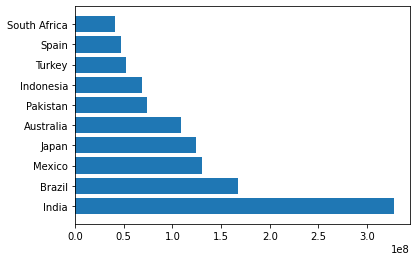

In [48]:
a=df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)
type(a)
plt.barh(a.index,a.values)

India has the highest yield production in the dataset. 

In [49]:
b=df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

In [ ]:
b

Item            Area     
Cassava         India        142810624
Potatoes        India         92122514
                Brazil        49602168
                Australia     45670386
Sweet potatoes  India         44439538
Potatoes        Japan         42918726
                Mexico        42053880
Sweet potatoes  Mexico        35808592
                Australia     35550294
Cassava         Brazil        33671231
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.


Boxplot that shows yield for each item 

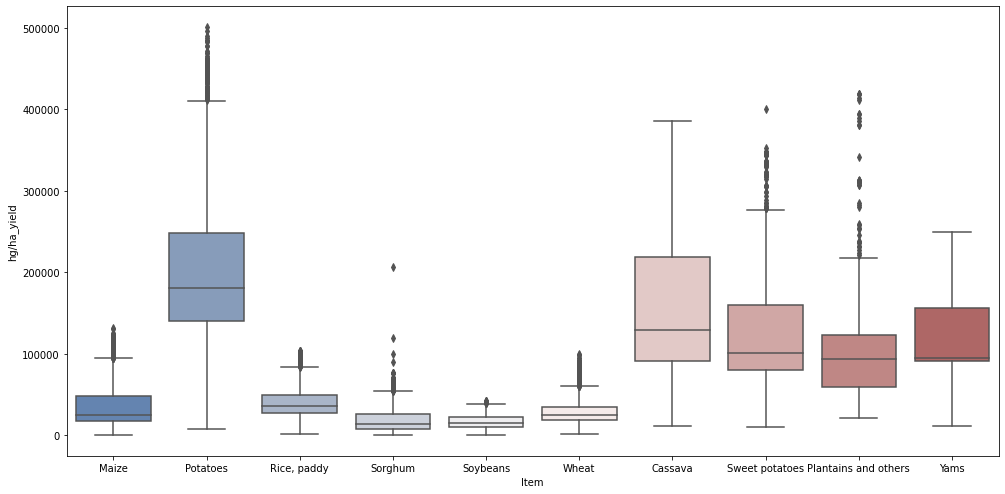

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=df,ax=ax);

#Machine learning

In [36]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

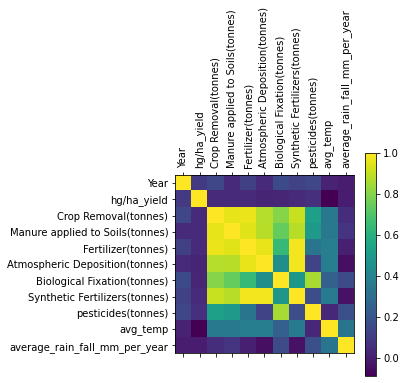

In [50]:
correlation_data=df.select_dtypes(include=[np.number]).corr()
#correlation_data
plt.matshow(correlation_data)
plt.colorbar()
plt.xticks(range(0,11),labels=correlation_data.columns,rotation=90)
plt.yticks(range(0,11),labels=correlation_data.columns)
plt.show()

The above correlation map shows that there is a strong correlation between crop removal, soil manipulation, fertiliser, Atmospheric Deposition, and Synthetic Fertilizers in the dataframe.

# Data Preprocessing

Data preprocessing is the process of converting raw data into well-formed data sets that may then be used for data mining analytical purposes. Raw data is frequently insufficient and formatted in an inconsistent manner.

## Encoding Categorical Variables:

A categorical column and a numerical column are present in the dataframe. Categorical data are variables that contain labels rather than numeric values, and the dataframe contains two categorical columns. The number of available values is frequently restricted to a fixed set, like in this case with the values for goods and nations. Many machine learning algorithms are unable to operate directly on label data because of the nature of the data. They need the use of numeric variables for all input and output variables.

This means that category data must be transformed into numerical data. In one hot encoding procedure, categorical data are changed into a form that can be fed into machine learning algorithms to help them do a more accurate job of prediction and classification. One-Hot Encoding will be utilised to turn these two columns into a single one-hot numeric array in order to achieve this goal.

The numerical value of an entry in the dataset is represented by the categorical value of that element. With this encoding, each category will be represented by a binary column, and the results will be returned as a matrix.

In [51]:
from sklearn.preprocessing import OneHotEncoder

With the help of 10 crops and 96 countries in total, the categorical data set was constructed. and the resulting 116 columns and 27506 rows are obtained by combining it with the other numerical variable.

In [69]:
df_onehot = pd.get_dummies(df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield']
label=df['hg/ha_yield']
features.head()

,Year,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,...,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,21083.6278,33137.9321,112964.8121,5346.88,980.0,73500.0,121.0,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1990,21083.6278,33137.9321,112964.8121,5346.88,980.0,73500.0,121.0,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1990,21083.6278,33137.9321,112964.8121,5346.88,980.0,73500.0,121.0,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1990,21083.6278,33137.9321,112964.8121,5346.88,980.0,73500.0,121.0,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1990,21083.6278,33137.9321,112964.8121,5346.88,980.0,73500.0,121.0,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Drooping the year column to make it easier to analyse the data. Because the year isn't taken into account.

In [70]:
features = features.drop(['Year'], axis=1)
features

,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,...,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,21083.6278,33137.9321,112964.8121,5346.88,980.00,73500.0,121.00,16.37,1485.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27507,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
27508,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
27509,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
27510,40873.9090,17456.5976,83148.4376,18855.90,9635.94,37200.0,2550.07,19.76,657.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


##Scaling Features:
Looking at the dataset above, it comprises features that are highly variable in terms of magnitudes, units, and ranges of values. The magnitudes of features with high magnitudes will be weighed significantly more heavily in the distance computations than the magnitudes of features with low magnitudes.

As a way to lessen this effect, we should bring all features up to the same level in terms of magnitudes. A way to do this is to scale up. For that MinMaxScaler is used from the sklearn.

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

Now our dataset is ready of machine learning training.

In [54]:
features

array([[0.        , 0.0024222 , 0.01507443, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0024222 , 0.01507443, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0024222 , 0.01507443, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.00469749, 0.00792322, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.00469749, 0.00792322, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.00469749, 0.00792322, ..., 0.        , 1.        ,
        0.        ]])

totaly there are 27506 data point for our machine learning.

In [55]:
len(features)

27506

#Training Data:
The training and test datasets will be separated from the original dataset. Because training the model usually necessitates as many data points as feasible, the data is usually split inequitably. For train/test, the most typical splits are 70/30 or 80/20.

The training dataset is the first set of data used to teach the machine learning algorithm to learn and make accurate predictions. (The training dataset accounts for 70% of the total dataset in our case.)

The test dataset, on the other hand, is used to see how well the ML algorithm performs with the training data. Because the ML algorithm will already "know" the expected output, you can't just reuse the training dataset in the testing stage, which defeats the objective of testing the algorithm. (30% of the dataset is devoted to testing in our case)

In [56]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)


The total avaliable datapoint for training.

In [57]:
len(train_data)

19254

Cross verifing the distribution.

In [58]:
27506*.7

19254.199999999997

#Model Comparison & Selection

The evaluation metric is set based on R^2  ([coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)) regression score function, that will represents the proportion of the variance for items (crops) in the regression model. R^2 score shows how well terms (data points) fit a curve or line.

R^2 is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance.

In [59]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

From sklearn we use Random Forest Regression, Gradient Boosting Regressor, Support vector machine and Decision Tree Regressor. This algoritham arestore in to a function "models".

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

Calling the function and passing our training data set to the model.

In [61]:
model_train=list(map(compare_models,models))

In [62]:
model_train

[['GradientBoostingRegressor', 0.9124880283317904],
 ['RandomForestRegressor', 0.6869294030172646],
 ['SVR', -0.2170076449414744],
 ['DecisionTreeRegressor', 0.9736778819961613]]

From results viewd above, Decision Tree Regressor has the highest R^2 score 0f 97%, GradientBoostingRegressor comes second with 91%.

I'll also calculate Adjusted R^2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted R2 will always be less than or equal to R2.



---


Setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 






In [66]:
df_onehot = df_onehot.drop(['Year'], axis=1)

KeyError: ignored

In [72]:
test_df=pd.DataFrame(test_data,columns=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield'].columns)

In [73]:
test_df

,Year,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,...,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.478261,0.000474,0.001872,0.000522,0.001260,0.000143,0.000213,0.000075,0.794208,0.104108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.739130,0.024276,0.112894,0.033845,0.008047,0.001873,0.033086,0.224154,0.721635,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.826087,0.646873,0.775089,0.364374,0.126123,0.708331,0.139927,0.912893,0.597615,0.536218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434783,0.004735,0.005060,0.001118,0.004000,0.000082,0.000121,0.000404,0.385349,0.124177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.217391,0.026297,0.029493,0.016013,0.007526,0.000206,0.018137,0.018117,0.562862,0.188460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,0.173913,0.005760,0.016400,0.006447,0.002752,0.000989,0.006449,0.032640,0.639864,0.609909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8248,

Using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

In [74]:
cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

Drooping all the categorical countries and item values from the test data set and only making it with only independent variables.

In [75]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df

,Year,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year
0,0.478261,0.000474,0.001872,0.000522,0.001260,0.000143,0.000213,0.000075,0.794208,0.104108
1,0.739130,0.024276,0.112894,0.033845,0.008047,0.001873,0.033086,0.224154,0.721635,1.000000
2,0.826087,0.646873,0.775089,0.364374,0.126123,0.708331,0.139927,0.912893,0.597615,0.536218
3,0.434783,0.004735,0.005060,0.001118,0.004000,0.000082,0.000121,0.000404,0.385349,0.124177
4,0.217391,0.026297,0.029493,0.016013,0.007526,0.000206,0.018137,0.018117,0.562862,0.188460
...,...,...,...,...,...,...,...,...,...,...
8247,0.173913,0.005760,0.016400,0.006447,0.002752,0.000989,0.006449,0.032640,0.639864,0.609909
8248,0.739130,0.001391,0.016846,0.002921,0.001514,0.000101,0.001813,0.002737,0.523680,0.449671
8249,0.826087,0.034360,0.026617,0.024972,0.020688,0.007306,0.026128,0.073025,0.661329,0.139229
8250,0.956522,0.025090,0.035051,0.018184,0.017991,0.001142,0.018019,0.022136,0.341056,0.168705


Adding countries and the Item produced in that countries for making prediction.

In [76]:
test_df['Country']=countries
test_df['Item']=items
test_df

,Year,Crop Removal(tonnes),Manure applied to Soils(tonnes),Fertilizer(tonnes),Atmospheric Deposition(tonnes),Biological Fixation(tonnes),Synthetic Fertilizers(tonnes),pesticides(tonnes),avg_temp,average_rain_fall_mm_per_year,Country,Item
0,0.478261,0.000474,0.001872,0.000522,0.001260,0.000143,0.000213,0.000075,0.794208,0.104108,Eritrea,Potatoes
1,0.739130,0.024276,0.112894,0.033845,0.008047,0.001873,0.033086,0.224154,0.721635,1.000000,Colombia,Wheat
2,0.826087,0.646873,0.775089,0.364374,0.126123,0.708331,0.139927,0.912893,0.597615,0.536218,Brazil,Yams
3,0.434783,0.004735,0.005060,0.001118,0.004000,0.000082,0.000121,0.000404,0.385349,0.124177,Azerbaijan,Soybeans
4,0.217391,0.026297,0.029493,0.016013,0.007526,0.000206,0.018137,0.018117,0.562862,0.188460,Greece,Sweet potatoes
...,...,...,...,...,...,...,...,...,...,...,...,...
8247,0.173913,0.005760,0.016400,0.006447,0.002752,0.000989,0.006449,0.032640,0.639864,0.609909,Guatemala,Sweet potatoes
8248,0.739130,0.001391,0.016846,0.002921,0.001514,0.000101,0.001813,0.002737,0.523680,0.449671,Albania,Potatoes
8249,0.826087,0.034360,0.026617,0.024972,0.020688,0.007306,0.026128,0.073025,0.661329,0.139229,South Africa,"Rice, paddy"
8250,0.956522,0.025090,0.035051,0.018184,0.017991,0.001142,0.018019,0.022136,0.341056,0.168705,Hungary,Sorghum


Using Decision Tree Regression for the prediction.

## So let's run the model actual values against the predicted ones 


In [78]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.976762
Maize                   0.946208
Plantains and others    0.826644
Potatoes                0.915648
Rice, paddy             0.932283
Sorghum                 0.903972
Soybeans                0.889555
Sweet potatoes          0.932008
Wheat                   0.949908
Yams                    0.897074
dtype: float64

### Visualizing

Ploating the actual yeild vs predicted yeald.


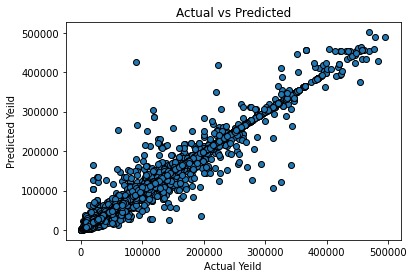

In [79]:
fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Yeild')
ax.set_ylabel('Predicted Yeild')
ax.set_title("Actual vs Predicted")
plt.show()

A data set has n values marked y1,...,yn (collectively known as yi or as a vector y = $[y_{1},...,y_{n}]^T$), each associated with a fitted (or modeled, or predicted) value $f_{1},...,f_{n}$ (known as $f_{i}$, or sometimes ŷi, as a vector **f**).

Define the residuals as $e_{i} = y_{i} − f_{i}$ (forming a vector **e**).

If $\bar{y}$ is the mean of the observed data:

$\bar{y}= \frac{1}{n} \sum _{i=1}^{n}y_{i}$

then the variability of the data set can be measured with two sums of squares formulas:
The sum of squares of residuals, also called the residual sum of squares:
$SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,$
The total sum of squares (proportional to the variance of the data):
$SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}$

The most general definition of the coefficient of determination is:

$R^{2} =1 - \frac{SS_{res}}{SS_{tot}}$

In [80]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
Cassava                 0.976208
Maize                   0.945512
Plantains and others    0.807239
Potatoes                0.914609
Rice, paddy             0.931181
Sorghum                 0.902309
Soybeans                0.887892
Sweet potatoes          0.930859
Wheat                   0.949200
Yams                    0.889991
dtype: float64

#Model Results & Conclusions

In [81]:
varimp= {'imp':model.feature_importances_,'names':df_onehot.columns[df_onehot.columns!="hg/ha_yield"]}

In [82]:
varimp

{'imp': array([1.53625038e-02, 1.27806596e-02, 1.32143256e-02, 7.86153703e-02,
        2.76111484e-02, 8.94568377e-03, 2.92076463e-02, 2.18437495e-02,
        2.98587402e-02, 2.54526261e-02, 8.24959696e-06, 3.87547744e-05,
        7.63829452e-05, 8.35220559e-05, 2.59827698e-07, 1.53155813e-02,
        1.82627287e-03, 5.60793816e-06, 2.38942562e-07, 0.00000000e+00,
        9.03546249e-05, 2.86235931e-03, 8.81531034e-05, 0.00000000e+00,
        9.27132751e-08, 1.70456312e-06, 4.64780119e-04, 1.27979475e-04,
        3.24512740e-05, 1.13967223e-02, 8.28417593e-08, 1.81341450e-04,
        6.94339798e-05, 9.17650252e-10, 0.00000000e+00, 8.25140003e-05,
        2.45962637e-03, 4.61734345e-03, 2.40160790e-03, 7.62893303e-07,
        0.00000000e+00, 2.35919398e-04, 2.27284954e-03, 7.54926372e-03,
        7.86746645e-04, 7.29170627e-04, 5.53219648e-03, 1.60920581e-07,
        4.54780166e-04, 1.97357264e-05, 5.36895716e-04, 1.96906372e-08,
        2.44356190e-05, 4.99451500e-06, 1.46731216e-04, 3

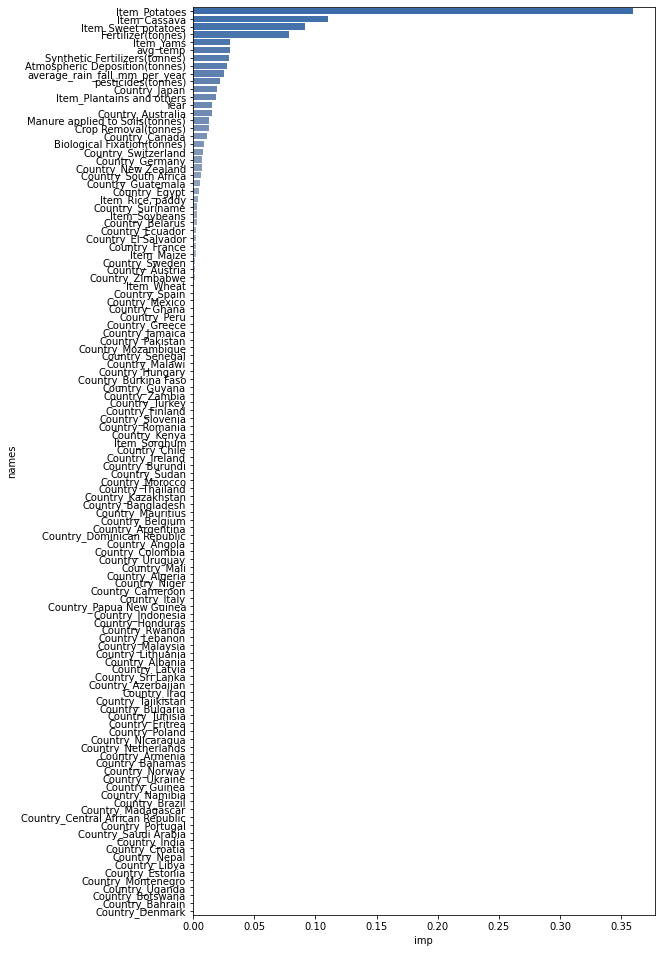

In [83]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df1=pd.DataFrame.from_dict(varimp)
df1.sort_values(ascending=False,by=["imp"],inplace=True)
df1=df1.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df1,orient="h",ax=ax);

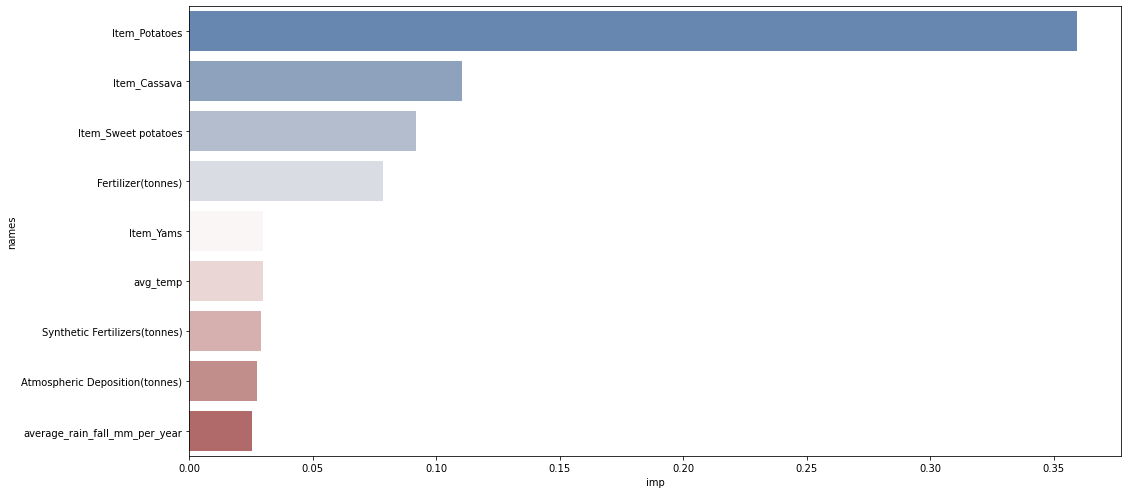

In [84]:
#10 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df2=pd.DataFrame.from_dict(varimp)
df2.sort_values(ascending=False,by=["imp"],inplace=True)
df2=df2.dropna()
df2=df2.nlargest(9, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df2,orient="h",ax=ax);

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava and sweet potatoes too, then as expected we see the effect of , where its the fourth most important feature is Atmospheric Deposition and synthetic Fertilizers. 

As we know the the synthetic fertilizers can improver the social quality with nutrients and Atmospheric Deposition. Followed by the climatic parameters such as rainfall and temperature. Further more the pesticides also plays an important role in decision making.